# Applying Classification Modeling

The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their credit card payment. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

- This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

- NT is the abbreviation for New Taiwan. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked with your partner.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
pd.set_option('display.max_columns', 75)

## 1. Data Cleaning

In [3]:
df = pd.read_csv('classification_lab_data.csv')

In [4]:
df.head(20)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0
5,150000,2,1,1,46,0,0,0,0,0,0,21787,22817,24134,24635,29032,29766,1382,1699,1200,5000,1214,1500,0
6,400000,2,2,2,41,-2,-2,-2,-2,-2,-2,43672,678,330,330,330,330,678,330,330,330,330,330,1
7,360000,2,2,2,31,0,-1,-1,-1,-2,-2,3386,5964,1340,1650,4350,4792,5964,1340,1650,4350,4792,40682,0
8,160000,2,2,2,32,2,2,2,2,-1,0,400,400,400,0,20818,20818,0,0,0,20818,0,0,0
9,500000,2,1,1,44,0,-1,-1,0,0,0,329570,71921,367979,294969,189612,128459,72001,368199,6486,234,90,167116,0


## 2. EDA

In [5]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000
mean,167825.729405,1.603608,1.856786,1.550773,35.523230,-0.014959,-0.134839,-0.165632,-0.217092,-0.261344,-0.285845,51589.034710,49521.698112,4.747483e+04,43796.589775,40748.049169,39226.852411,5687.720113,6.019571e+03,5253.322805,4824.490687,4825.033793,5245.642943,0.221176
std,129915.115993,0.489158,0.791939,0.522431,9.253986,1.120903,1.193044,1.193515,1.168719,1.133016,1.150394,74104.132627,71551.215125,7.001082e+04,64927.450125,61257.537699,60075.536736,16698.506577,2.454136e+04,17967.028860,15730.753527,15596.580167,17795.775322,0.415047
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-67526.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3577.500000,2958.000000,2.718000e+03,2392.500000,1801.000000,1280.000000,1000.000000,8.585000e+02,395.000000,300.000000,269.500000,125.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22472.000000,21290.000000,2.022300e+04,19145.000000,18227.000000,17175.000000,2110.000000,2.012000e+03,1809.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67767.000000,64635.500000,6.096200e+04,55418.000000,50581.000000,49434.500000,5020.000000,5.000000e+03,4561.000000,4089.000000,4029.500000,4008.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df = df.rename(columns={'default payment next month':'DEFAULT_NEXT'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 24 columns):
LIMIT_BAL       23999 non-null int64
SEX             23999 non-null int64
EDUCATION       23999 non-null int64
MARRIAGE        23999 non-null int64
AGE             23999 non-null int64
PAY_0           23999 non-null int64
PAY_2           23999 non-null int64
PAY_3           23999 non-null int64
PAY_4           23999 non-null int64
PAY_5           23999 non-null int64
PAY_6           23999 non-null int64
BILL_AMT1       23999 non-null int64
BILL_AMT2       23999 non-null int64
BILL_AMT3       23999 non-null int64
BILL_AMT4       23999 non-null int64
BILL_AMT5       23999 non-null int64
BILL_AMT6       23999 non-null int64
PAY_AMT1        23999 non-null int64
PAY_AMT2        23999 non-null int64
PAY_AMT3        23999 non-null int64
PAY_AMT4        23999 non-null int64
PAY_AMT5        23999 non-null int64
PAY_AMT6        23999 non-null int64
DEFAULT_NEXT    23999 non-null int64
dty

In [8]:
df.nunique()

LIMIT_BAL          80
SEX                 2
EDUCATION           7
MARRIAGE            4
AGE                56
PAY_0              11
PAY_2              11
PAY_3              11
PAY_4              11
PAY_5              10
PAY_6              10
BILL_AMT1       18732
BILL_AMT2       18413
BILL_AMT3       18143
BILL_AMT4       17824
BILL_AMT5       17372
BILL_AMT6       17094
PAY_AMT1         6923
PAY_AMT2         6905
PAY_AMT3         6547
PAY_AMT4         6060
PAY_AMT5         5989
PAY_AMT6         6021
DEFAULT_NEXT        2
dtype: int64

In [9]:
continuous_factors = pd.DataFrame([])
categorical_factors = pd.DataFrame([])

for col in list(df):
    if col.startswith('BILL') or col.startswith('PAY_AMT') or col.startswith('AGE') or col == 'LIMIT_BAL':
        continuous_factors = pd.concat([continuous_factors, df[col]], axis=1)
    else:
        categorical_factors = pd.concat([categorical_factors, df[col]], axis=1)    

In [10]:
continuous_factors.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,50000,49,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868
1,30000,39,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500
2,260000,27,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200
3,200000,33,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100
4,50000,27,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783


In [11]:
categorical_factors.head()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT_NEXT
0,1,2,2,0,0,0,0,0,0,1
1,1,2,1,0,0,0,0,0,0,0
2,1,1,2,0,0,0,0,0,0,0
3,2,2,1,0,0,0,0,0,0,0
4,1,1,2,0,0,0,0,0,0,0


Target Variable
DEFAULT_NEXT
0    18691
1     5308
Name: DEFAULT_NEXT, dtype: int64
percent default: 0.284


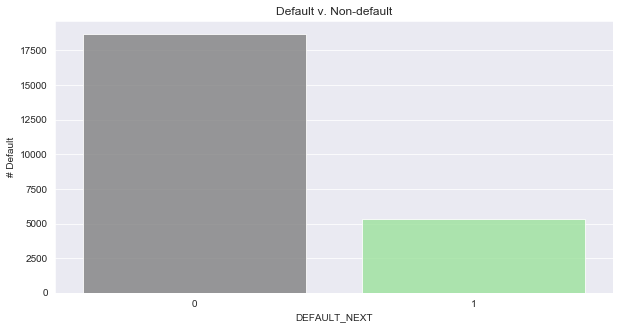

In [12]:
# Default Count
print('Target Variable')
print(df.groupby(['DEFAULT_NEXT']).DEFAULT_NEXT.count())
percent_default = 5308/18691
print(f'percent default: {round(percent_default, 3)}')

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['DEFAULT_NEXT'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Default v. Non-default')
plt.ylabel('# Default')
plt.show()

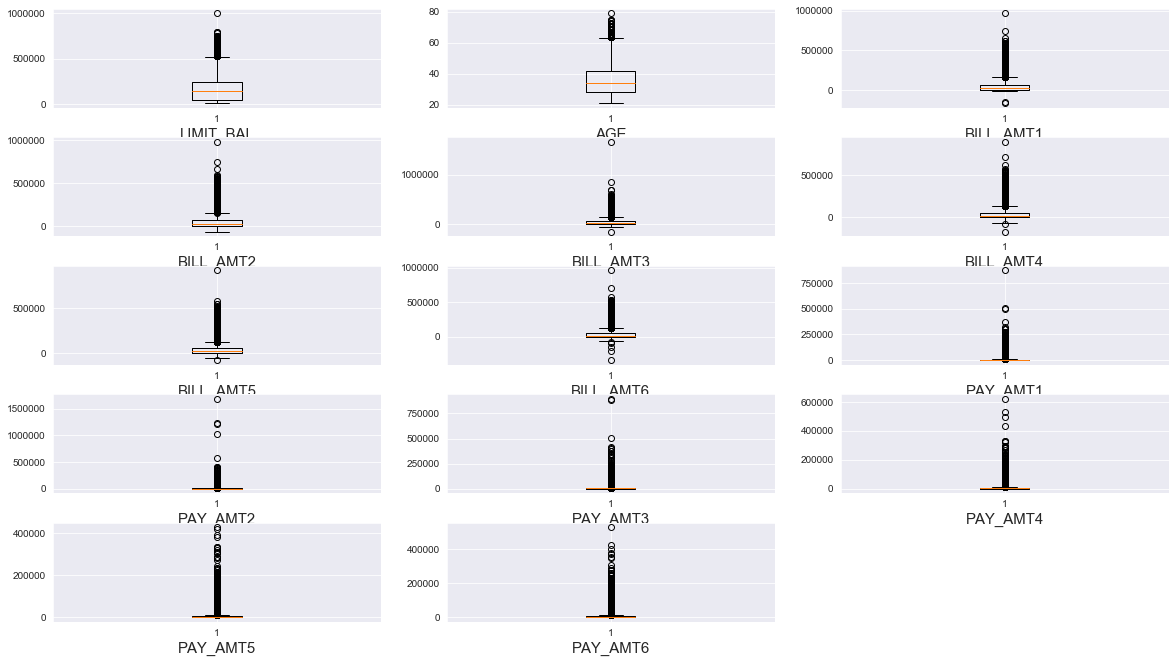

In [13]:
columns = list(continuous_factors)

# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

for col in columns:
    x = columns.index(col)
    ax = fig.add_subplot(len(columns)/2,3,x+1)
    ax.boxplot(df[col])
    ax.set_xlabel(col, fontsize = 15)
    
plt.show()

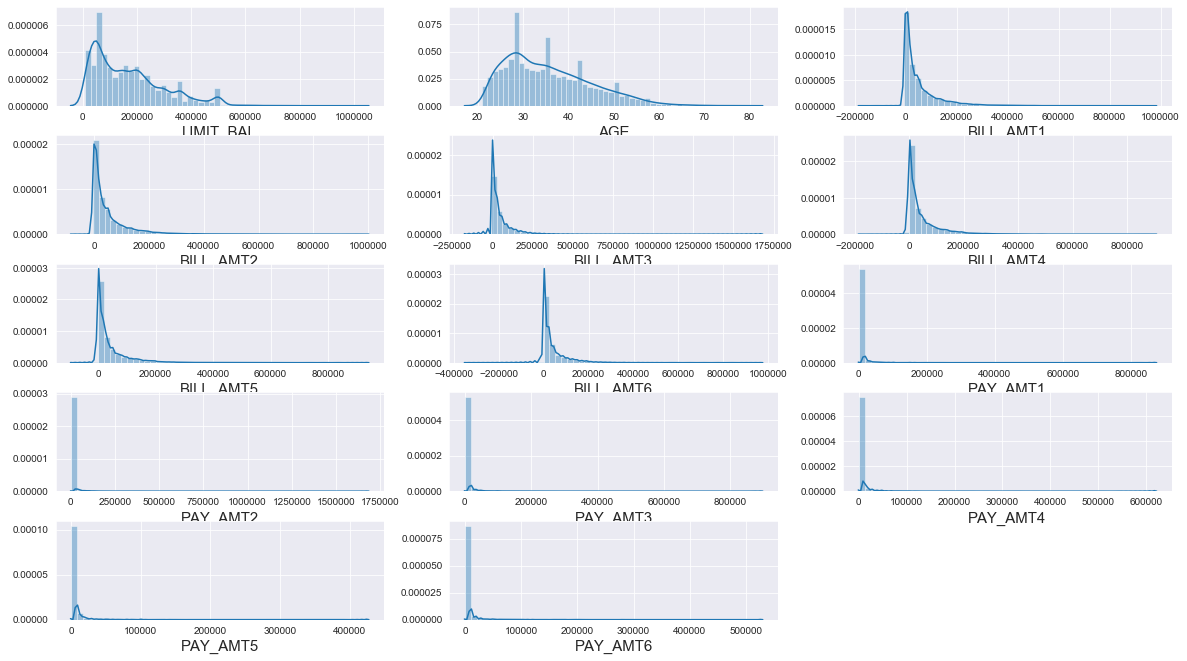

In [15]:
#columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

for col in columns:
    x = columns.index(col)+1
    ax = fig.add_subplot(len(columns)/2,3,x)
    sns.distplot(df[col])
    ax.set_xlabel(col, fontsize = 15)

In [16]:
feat_df = df.copy()

pay_periods = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
for pay_period in pay_periods:
    feat_df[pay_period][feat_df[pay_period]<=0] = 0
	
for col1 in pay_periods:
    feat_df[col1] = feat_df[col1].astype("category").cat.as_ordered()

for col2 in ["SEX", "EDUCATION", "MARRIAGE"]:
    feat_df[col2] = feat_df[col2].astype("category").cat.as_unordered()


ed_dummy = pd.get_dummies(df["EDUCATION"], prefix="ED", drop_first=True)
marry_dummy = pd.get_dummies(df["MARRIAGE"], prefix="MARRY", drop_first=True)

feat_df = pd.concat([feat_df, ed_dummy, marry_dummy], axis=1)

feat_df.drop(["EDUCATION", "MARRIAGE"], axis=1, inplace=True)
feat_df.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NEXT,ED_1,ED_2,ED_3,ED_4,ED_5,ED_6,MARRY_1,MARRY_2,MARRY_3
0,50000,1,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1,0,1,0,0,0,0,0,1,0
1,30000,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0,0,1,0,0,0,0,1,0,0
2,260000,1,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0,1,0,0,0,0,0,0,1,0
3,200000,2,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0,0,1,0,0,0,0,1,0,0
4,50000,1,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0,1,0,0,0,0,0,0,1,0


In [284]:
# We have outliers
print(df['BILL_AMT5'].min())
print(df['BILL_AMT3'].max())

-81334
1664089


In [285]:
df[columns].sum()

BILL_AMT1    1238085244
BILL_AMT2    1188471233
BILL_AMT3    1139348358
BILL_AMT4    1051074358
BILL_AMT5     977912432
BILL_AMT6     941405231
dtype: int64

In [82]:
ALL_BILL_AMTS = pd.DataFrame([])

for col in columns:
    ALL_BILL_AMTS = pd.concat([ALL_BILL_AMTS, df[col]], axis=1)

# Aggregate mean across all bills
AGG_BILL_MEAN = ALL_BILL_AMTS.mean(axis=1)

AGG_BILL_MEAN = pd.DataFrame(AGG_BILL_MEAN)
AGG_BILL_MEAN.mean()

0    45392.841757
dtype: float64

In [78]:
# Create a function that returns the dataframe with accounts and defaults for each category
def default_freq(column_name):
    categories, accounts, defaults = [], [], []
    for category in range(df[column_name].min(), df[column_name].max()+1):
        categories.append(category)
        accounts.append(df[column_name][df[column_name]==category].count())
        defaults.append(df["DEFAULT_NEXT"][df[column_name]==category].sum())
    count_df = pd.DataFrame(list(zip(categories, accounts, defaults)), 
                            columns=[column_name.lower(), "accounts", "defaults"])
    fig = plt.figure()
    ax = plt.axes()
    ax.bar(categories, np.subtract(accounts, defaults), label='accounts', bottom=defaults)
    ax.bar(categories, defaults, label='defaults')
    ax.set_ylabel("Defaults by {}".format(column_name.title()))
    ax.set_xlabel(column_name.title())
    ax.legend(loc="best")
    return count_df, fig, ax

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


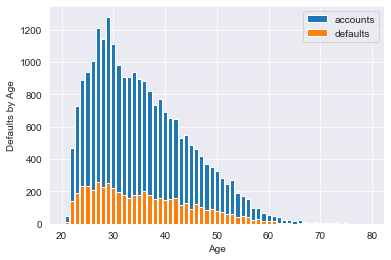

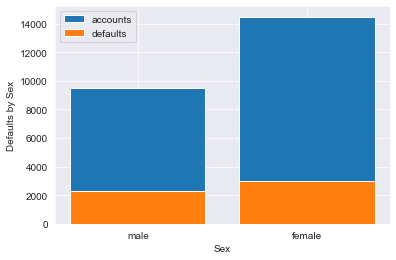

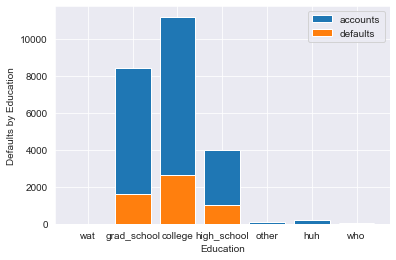

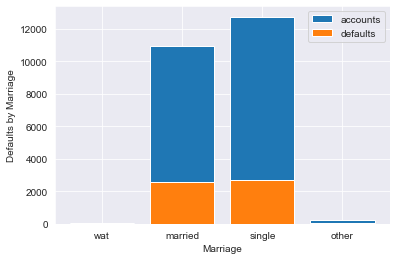

In [80]:
# DEFAULTS BY AGE
age_freq, fig, ax = default_freq('AGE')
age_freq

sex_freq, sex_fig, sex_ax = default_freq("SEX")
sexes = ["male", "female"]
plt.xticks([1,2], sexes)
sex_freq["sex"] = sexes
sex_freq

ed_freq, ed_fig, ed_ax = default_freq("EDUCATION")
eds = ["wat", "grad_school", "college", "high_school", "other", "huh", "who"]
plt.xticks(list(range(0,7)), eds)
ed_freq["education"] = eds
ed_freq

married_freq, married_fig, married_ax = default_freq("MARRIAGE")
married = ["wat", "married", "single", "other"]
plt.xticks([0,1,2,3], married)

married_freq["marriage"] = married
married_freq

fig.show()

In [34]:
# chi squared test for bill amounts
from scipy.stats import chisquare
chisq, p = chisquare(df[columns], ddof=9)

print(chisq)
print(p)

[2.55447998e+09 2.48092450e+09 2.47766128e+09 2.30989079e+09
 2.20997469e+09 2.20793817e+09]
[0. 0. 0. 0. 0. 0.]


In [92]:
print('Statistical Summary of Sex and Default')
print('\n')
print('Default')
print(df[df['DEFAULT_NEXT']==1][['SEX','AGE']].describe().transpose())
print('--'*40)
print('No Default')
print(df[df['DEFAULT_NEXT']==1][['SEX','AGE']].describe().transpose())
# Subplots of Numeric Features
#sns.set_style('darkgrid')
#fig = plt.figure(figsize = (16,10))
#fig.subplots_adjust(hspace = .30)
#
#ax1 = fig.add_subplot(221)
#ax1.hist(df[df['DEFAULT_NEXT'] ==1].SEX, bins = 25, label ='Default', alpha = .50,edgecolor= 'black',color ='grey')
#ax1.hist(df[df['DEFAULT_NEXT']==1].SEX, bins = 25, label = 'Default', alpha = .50, edgecolor = 'black',color = 'lightgreen')
#ax1.set_title('Passenger Sex: Default vs No Default')
#ax1.set_xlabel('Sex')
#ax1.set_ylabel('# Default')
#ax1.legend(loc = 'upper right')
#
#ax2 = fig.add_subplot(223)
#ax2.hist(df[df['DEFAULT_NEXT']==1].AGE, bins = 25, label = 'Default', alpha = .50, edgecolor ='black', color = 'grey')
#ax2.hist(df[df['DEFAULT_NEXT']==0].AGE, bins = 25, label = 'No Default', alpha = .50, edgecolor = 'black',color ='lightgreen')
#ax2.set_title('Age vs Default')
#ax2.set_xlabel('Age')
#ax2.set_ylabel('# Default')
#ax2.legend(loc = 'upper right')
#
#ax3 = fig.add_subplot(122)
#ax3.scatter(x = df[df['DEFAULT_NEXT']==1].SEX, y = df[df['DEFAULT_NEXT']==1].DEFAULT_NEXT,
#                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'DEFAULT')
#ax3.scatter(x = df[df['DEFAULT_NEXT']==0].SEX, y = df[df['DEFAULT_NEXT']==0].DEFAULT_NEXT,
#                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'NO DEFAULT')
#ax3.set_xlabel('SEX')
#ax3.set_ylabel('AGE')
#ax3.set_title('  ')
#ax3.legend()
#
#plt.show()

Statistical Summary of Sex and Default


Default
      count       mean       std   min   25%   50%   75%   max
SEX  5308.0   1.567069  0.495528   1.0   1.0   2.0   2.0   2.0
AGE  5308.0  35.732856  9.692436  21.0  28.0  34.0  42.0  75.0
--------------------------------------------------------------------------------
No Default
      count       mean       std   min   25%   50%   75%   max
SEX  5308.0   1.567069  0.495528   1.0   1.0   2.0   2.0   2.0
AGE  5308.0  35.732856  9.692436  21.0  28.0  34.0  42.0  75.0


In [139]:
#from scipy import stats
#std_sex = 0.4955
#mean_sex = 1.5671
#z_scores = pd.Series(stats.zscore(df['SEX'], ddof=1)).apply(lambda x: (round(abs(mean_sex-x),4))).mean()
#z_scores

In [141]:
# Train Test Split
# Create matrix of features
X = df.drop('DEFAULT_NEXT', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = df['DEFAULT_NEXT'] # y is the column we're trying to predict

# Create a list of the features being used in the 
feature_cols = X.columns

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [142]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783


In [143]:
# examine the class distribution of the testing set (using a Pandas Series method) (I.E., IF NULL HYPOTHESIS)
y_test.value_counts()

0    4632
1    1368
Name: DEFAULT_NEXT, dtype: int64

In [144]:
# calculate the percentage of ones
y_test.mean()

0.228

In [145]:
# calculate the percentage of zeros
1 - y_test.mean()

0.772

In [146]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.772

## 3. Feature Engineering

In [35]:
feat_df

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_NEXT,ED_1,ED_2,ED_3,ED_4,ED_5,ED_6,MARRY_1,MARRY_2,MARRY_3
0,50000,1,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1,0,1,0,0,0,0,0,1,0
1,30000,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0,0,1,0,0,0,0,1,0,0
2,260000,1,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0,1,0,0,0,0,0,0,1,0
3,200000,2,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0,0,1,0,0,0,0,1,0,0
4,50000,1,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0,1,0,0,0,0,0,0,1,0
5,150000,2,46,0,0,0,0,0,0,21787,22817,24134,24635,29032,29766,1382,1699,1200,5000,1214,1500,0,1,0,0,0,0,0,1,0,0
6,400000,2,41,0,0,0,0,0,0,43672,678,330,330,330,330,678,330,330,330,330,330,1,0,1,0,0,0,0,0,1,0
7,360000,2,31,0,0,0,0,0,0,3386,5964,1340,1650,4350,4792,5964,1340,1650,4350,4792,40682,0,0,1,0,0,0,0,0,1,0
8,160000,2,32,2,2,2,2,0,0,400,400,400,0,20818,20818,0,0,0,20818,0,0,0,0,1,0,0,0,0,0,1,0
9,500000,2,44,0,0,0,0,0,0,329570,71921,367979,294969,189612,128459,72001,368199,6486,234,90,167116,0,1,0,0,0,0,0,1,0,0


In [31]:
pct_balance = (df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6'])/df['LIMIT_BAL']

In [51]:
df['AGE'].describe()


df['AGE'].std()


9.25398578925579

In [49]:
within_1std_age = df['AGE'].apply(lambda x: 1 if df['AGE'].mean()-df['AGE'].std() < x < df['AGE'].mean()+df['AGE'].std() else 0)



In [50]:
within_1std_age

0        0
1        1
2        1
3        1
4        1
5        0
6        1
7        1
8        1
9        1
10       0
11       0
12       1
13       1
14       0
15       0
16       1
17       1
18       0
19       0
20       1
21       0
22       0
23       1
24       1
25       1
26       1
27       1
28       1
29       0
        ..
23969    1
23970    1
23971    0
23972    0
23973    1
23974    1
23975    1
23976    1
23977    0
23978    1
23979    1
23980    1
23981    1
23982    1
23983    1
23984    1
23985    1
23986    1
23987    1
23988    1
23989    1
23990    0
23991    0
23992    0
23993    0
23994    1
23995    1
23996    1
23997    1
23998    1
Name: AGE, Length: 23999, dtype: int64

## 4. Feature Selection

In [ ]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error')

# step size larger for more features

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

RFECV_selected_columns = X_train.columns[selector.support_]
RFECV_removed_columns = X_train.columns[~selector.support_]

list(RFECV_selected_columns)

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

In [258]:
# function to reduce annoyance
def TTS_with_colnames(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)
    allcols = []
    for col in X_train.columns:
        allcols.append(col)
    allcols.append(y_train.name)
    
    training  = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
    training.columns = allcols
    return X_train, X_test, y_train, y_test, training

In [260]:
# Run a dummy classifier for baseline assessment

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score

# setting up testing and training sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)
#X_train_cols = X_train.columns
#y_train_cols = y_train.name

X_train, X_test, y_train, y_test, training = TTS_with_colnames(X, y)

# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

In [261]:
# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, dummy_pred))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, dummy_pred))
print('This model is very imprecise.')

Test Accuracy score:  0.779
Test F1 score:  0.0
This model is very imprecise.


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [262]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
y_pred_test = lr_clf.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, y_pred_test))

Test Accuracy score:  0.8143333333333334
Test F1 score:  0.3741573033707865


In [263]:
# Deal with class imbalances with upsampling
# concatenate our training data back together

#X_train = pd.DataFrame(X_train)
#y_train = pd.DataFrame(y_train)
#training  = pd.concat([X_train, y_train], axis=1)

In [264]:
# separate minority and majority classes
no_default = training[training.DEFAULT_NEXT==0]
default = training[training.DEFAULT_NEXT==1]

# Get a class count to understand the class imbalance.
print('Default count: '+ str(len(default)))
print('Paid count: '+ str(len(no_default)))

Default count: 3982
Paid count: 14017


In [265]:
#Upsample minority
from sklearn.utils import resample
default_upsampled = resample(default,
                          replace=True, # sample with replacement
                          n_samples=len(no_default), # match number in majority class
                          random_state=11) # reproducible results

In [266]:
# combine majority and upsampled minority
upsampled = pd.concat([no_default, default_upsampled])

# check new class counts
upsampled.DEFAULT_NEXT.value_counts()

1    14017
0    14017
Name: DEFAULT_NEXT, dtype: int64

In [267]:
# trying logistic regression again with the balanced dataset
y_train_up = upsampled.DEFAULT_NEXT
X_train_up = upsampled.drop('DEFAULT_NEXT', axis=1)


# upsampled_dt = DecisionTreeClassifier(max_depth=5)
upsampled_lr = LogisticRegression(solver='liblinear')


# upsampled_dt.fit(X_train, y_train)
upsampled_lr.fit(X_train_up, y_train_up)


# upsampled_pred = upsampled_dt.predict(X_test)
upsampled_pred = upsampled_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, upsampled_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, upsampled_pred))

Test Accuracy score:  0.5625
Test F1 score:  0.40785021430182716


In [268]:
#Oversampling with SMOTE
from imblearn.over_sampling import SMOTE

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

sm = SMOTE(random_state=42, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [250]:
# smote_dt = DecisionTreeClassifier(max_depth=5)
smote_lr = LogisticRegression(solver='liblinear')

# smote_dt.fit(X_train, y_train)
smote_lr.fit(X_train, y_train)

# smote_pred = smote_dt.predict(X_test)
smote_pred = smote_lr.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, smote_pred))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, smote_pred))

Test Accuracy score:  0.5718333333333333
Test F1 score:  0.43151139632662094


In [251]:
# Undersampling (Tomek)
from collections import Counter
from imblearn.under_sampling import TomekLinks # doctest: +NORMALIZE_WHITESPACE

tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 14017, 1: 13626})


In [252]:
feature_cols

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

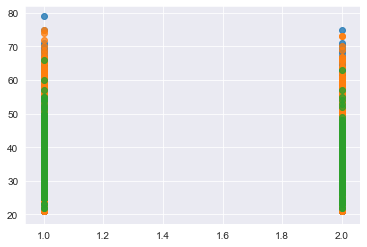

In [253]:
# remove Tomek links
tl = TomekLinks(return_indices=True)
X_resampled, y_resampled, idx_resampled = tl.fit_sample(X_train, y_train)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

idx_samples_removed = np.setdiff1d(np.arange(X_train.shape[0]),
                                   idx_resampled)
idx_class_0 = y_resampled == 0
plt.scatter(X_resampled[idx_class_0, 1], X_resampled[idx_class_0, 4],
            alpha=.8, label='Class #0')
plt.scatter(X_resampled[~idx_class_0, 1], X_resampled[~idx_class_0, 4],
            alpha=.8, label='Class #1')
plt.scatter(X_train[idx_samples_removed, 1], X_train[idx_samples_removed, 4],
             alpha=.8, label='Removed samples')

In [164]:
len(idx_samples_removed)

391

In [165]:
len(X_train)

28034

In [166]:
len(X_resampled)

27643

In [168]:
tomek_lr = LogisticRegression()

tomek_lr.fit(X_resampled, y_resampled)
tomek_pred = tomek_lr.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, tomek_pred))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, tomek_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test Accuracy score:  0.5833333333333334
Test F1 score:  0.4369369369369369


In [272]:
#KNN
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)

In [273]:
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

NameError: name 'metrics' is not defined

## 6. Model Evaluation

## 7. Final Model